#  Исследовательский проект: _"Динамическое моделирование базиса между доходностями ОФЗ и своп-ставками"_.

### _Выполнил: Лысенко Глеб (э301)_

## Теоретический аспект

Предполагается, что спреды по свопам являются индикаторами неопределенности рынка, которая увеличивается во время финансовых трудностей. Это связано с тем, что фиксированный платеж в IRS обменивается на плавающий платеж, который обычно основан на ключевой ставке ЦБ и влечет за собой кредитный риск. Следовательно, даже если IRS обеспечены залогом и рассматриваются как свободные от кредитного риска контрагента, ставка свопа должна быть выше (теоретической) безрисковой ставки из-за кредитного риска, связанного со ставкой ЦБ. Следовательно, спрэды свопов должны увеличиваться во время повышенного банковского кредитного риска (Collin-Dufresne and Solnik, 2001). Вдобавок к этому ОФЗ (которые являются эталоном, по которому рассчитываются спреды свопов) имеют статус «безопасной гавани», то есть активов, которые инвесторы ценят за их безопасность и ликвидность. Во время финансовых затруднений инвесторы еще больше ценят удобство хранения безопасных и ликвидных активов, что снижает доходность ОФЗ и заставляет их торговать с премией за ликвидность или удобной доходностью (Longstaff, 2004, Krishnamurthy and Vissing-Jorgensen , 2012, или Feldh¨utter and Lando, 2008). Таким образом, представляется актуальным моделирвание базиса между доходностями ОФЗ и своп-ставками с целью анализа неопределённости рынка и вявления дополнительных рисков.

## Методология и данные

Для анализа базиса будут использованы копулы (многомерные и двумерные) и метод "пристального взгляда". Использованы ежедневные данные по своповым ставкам Сбербанка на ключевую ставку и КБД Мосбиржи за период с июля 2018 г. по декабрь 2021 г. срочности 1,5,7,10 лет. 

In [2]:
import numpy as np
import pandas as pd
data='Rates.xlsx'
data=pd.ExcelFile(data)
print(data.sheet_names)
df = data.parse('Data')
df['spread_1y']=df['s_1y']-df['r_1y']
df['spread_3y']=df['s_3y']-df['r_3y']
df['spread_5y']=df['s_5y']-df['r_5y']
df['spread_7y']=df['s_1y']-df['r_7y']
df['spread_10y']=df['s_10y']-df['r_10y']

['Data']


# Графический анализ

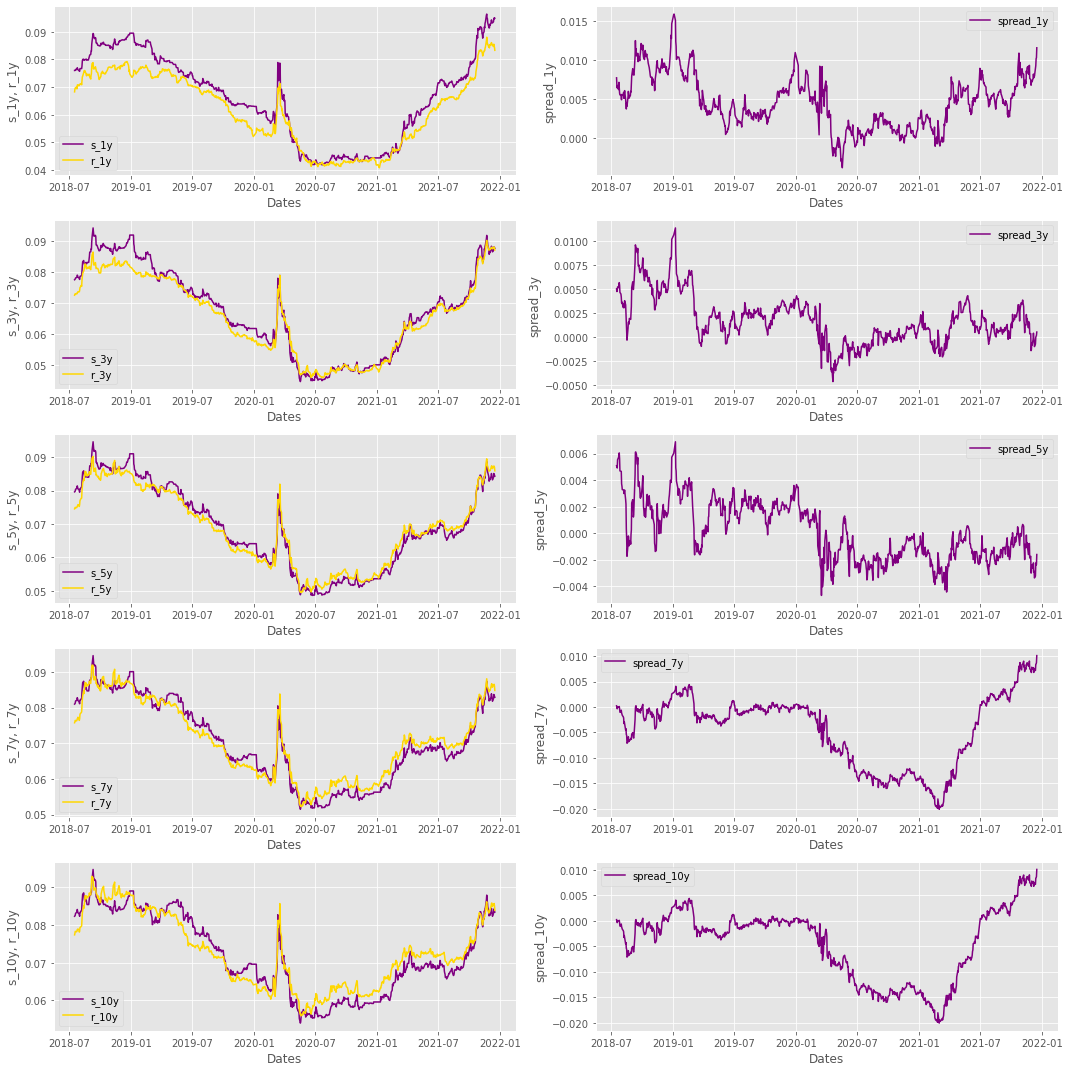

In [174]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))


axs[0, 0].plot(df['Dates'], df['s_1y'], label='s_1y', color='purple' )
axs[0, 0].plot(df['Dates'], df['r_1y'], label='r_1y', color='gold')
axs[0, 0].set_xlabel("Dates")
axs[0, 0].set_ylabel('s_1y, r_1y')
axs[0, 0].legend()

axs[0, 1].plot(df['Dates'], df['spread_1y'], label='spread_1y', color='purple' )
axs[0, 1].set_xlabel("Dates")
axs[0, 1].set_ylabel('spread_1y')
axs[0, 1].legend()


axs[1, 0].plot(df['Dates'], df['s_3y'], label='s_3y', color='purple' )
axs[1, 0].plot(df['Dates'], df['r_3y'], label='r_3y', color='gold')
axs[1, 0].set_xlabel("Dates")
axs[1, 0].set_ylabel('s_3y, r_3y')
axs[1, 0].legend()

axs[1, 1].plot(df['Dates'], df['spread_3y'],label='spread_3y', color='purple' )
axs[1, 1].set_xlabel("Dates")
axs[1, 1].set_ylabel('spread_3y')
axs[1, 1].legend()

axs[2, 0].plot(df['Dates'], df['s_5y'], label='s_5y', color='purple' )
axs[2, 0].plot(df['Dates'], df['r_5y'], label='r_5y', color='gold')
axs[2, 0].set_xlabel("Dates")
axs[2, 0].set_ylabel('s_5y, r_5y')
axs[2, 0].legend()

axs[2, 1].plot(df['Dates'], df['spread_5y'],label='spread_5y',  color='purple' )
axs[2, 1].set_xlabel("Dates")
axs[2, 1].set_ylabel('spread_5y')
axs[2, 1].legend()

axs[3, 0].plot(df['Dates'], df['s_7y'], label='s_7y', color='purple' )
axs[3, 0].plot(df['Dates'], df['r_7y'], label='r_7y', color='gold')
axs[3, 0].set_xlabel("Dates")
axs[3, 0].set_ylabel('s_7y, r_7y')
axs[3, 0].legend()

axs[3, 1].plot(df['Dates'], df['spread_7y'], label='spread_7y',  color='purple' )
axs[3, 1].set_xlabel("Dates")
axs[3, 1].set_ylabel('spread_7y')
axs[3, 1].legend()


axs[4, 0].plot(df['Dates'], df['s_10y'], label='s_10y', color='purple' )
axs[4, 0].plot(df['Dates'], df['r_10y'], label='r_10y', color='gold')
axs[4, 0].set_xlabel("Dates")
axs[4, 0].set_ylabel('s_10y, r_10y')
axs[4, 0].legend()

axs[4, 1].plot(df['Dates'], df['spread_7y'], label='spread_10y', color='purple' )
axs[4, 1].set_xlabel("Dates")
axs[4, 1].set_ylabel('spread_10y')
plt.style.use('ggplot')
axs[4, 1].legend()


fig.tight_layout()
plt.show()

Из графиков видно, что с началом "коронакризиса" ставки резко подскочили вверх, при этом спрэд приблизился к 0. Более того, впоследствии до января 2021 г. для свовпов с относительно длинной срочностью отмечается отрицательный спрэд (и его падение) с последующим ростом в течение года, что, веротяно, объясняется динамикой ключевой ставки и представляет собой дальнейшее направление для исследований.  

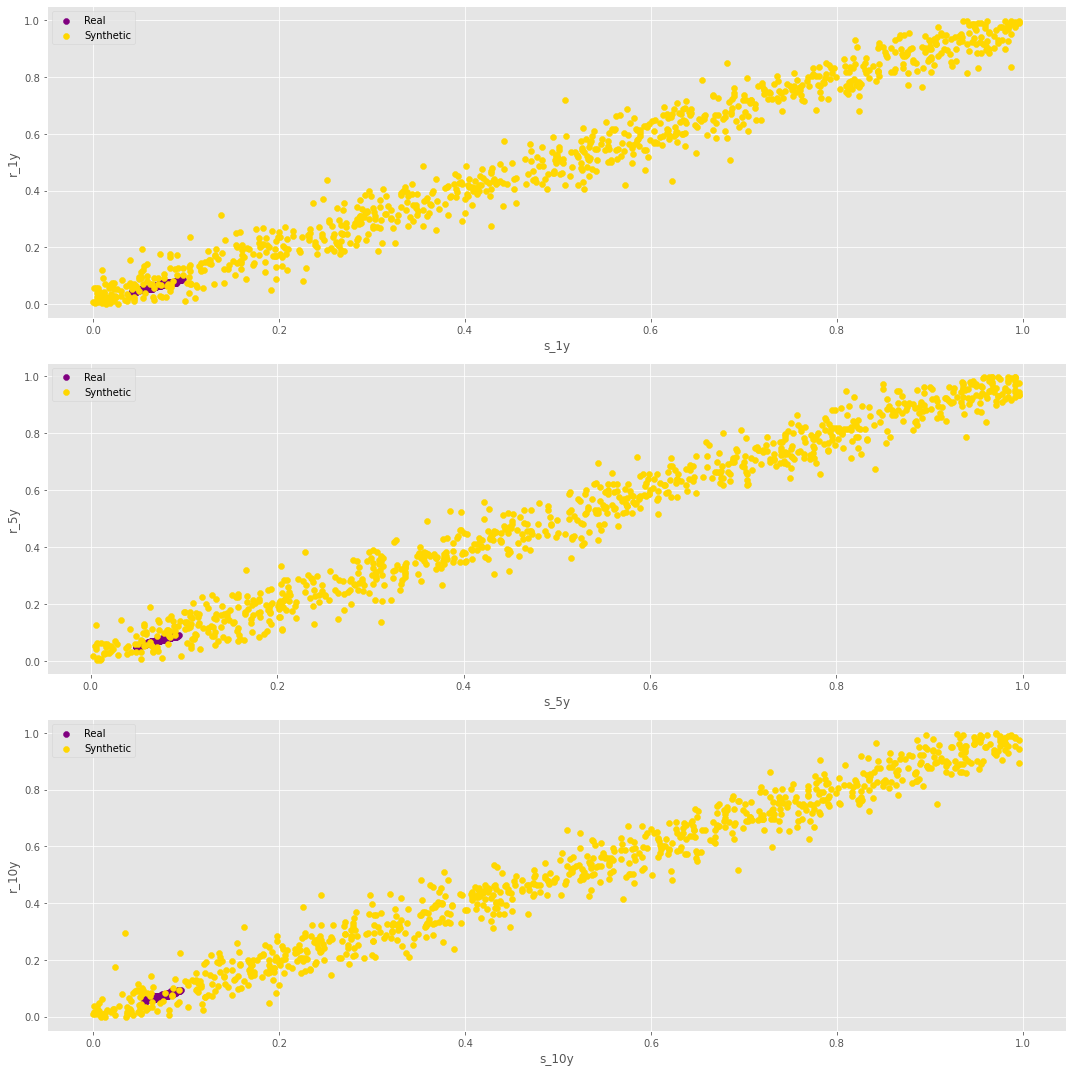

In [179]:
# Используем копулу Фрэнка для попарного моделирования

import copulas
from copulas.bivariate import Frank
from copulas.visualization import compare_2d
copula_F_1y=Frank()
data_F_1y=np.array([df['s_1y'].to_numpy(), df['r_1y'].to_numpy()])
data_F_1y=data_F_1y.T
copula_F_1y.fit(data_F_1y)
synthetic_data_F_1y=copula_F_1y.sample(len(data_F_1y))
synthetic_data_F_1y=pd.DataFrame(synthetic_data_F_1y)

copula_F_5y=Frank()
data_F_5y=np.array([df['s_5y'].to_numpy(), df['r_5y'].to_numpy()])
data_F_5y=data_F_5y.T
copula_F_5y.fit(data_F_5y)
synthetic_data_F_5y=copula_F_1y.sample(len(data_F_5y))
synthetic_data_F_5y=pd.DataFrame(synthetic_data_F_5y)

copula_F_10y=Frank()
data_F_10y=np.array([df['s_10y'].to_numpy(), df['r_10y'].to_numpy()])
data_F_10y=data_F_10y.T
copula_F_10y.fit(data_F_10y)
synthetic_data_F_10y=copula_F_1y.sample(len(data_F_10y))
synthetic_data_F_10y=pd.DataFrame(synthetic_data_F_10y)

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))


axs[0].scatter(df['s_1y'], df['r_1y'], label='Real', color='purple' )
axs[0].scatter(synthetic_data_F_1y[0], synthetic_data_F_1y[1], label='Synthetic', color='gold')
axs[0].set_xlabel("s_1y")
axs[0].set_ylabel('r_1y')
axs[0].legend()

axs[1].scatter(df['s_5y'], df['r_5y'], label='Real', color='purple' )
axs[1].scatter(synthetic_data_F_5y[0], synthetic_data_F_5y[1], label='Synthetic', color='gold')
axs[1].set_xlabel("s_5y")
axs[1].set_ylabel('r_5y')
axs[1].legend()

axs[2].scatter(df['s_10y'], df['r_10y'], label='Real', color='purple' )
axs[2].scatter(synthetic_data_F_10y[0],synthetic_data_F_10y[1],  label='Synthetic', color='gold')
axs[2].set_xlabel("s_10y")
axs[2].set_ylabel('r_10y')
axs[2].legend()

fig.tight_layout()
plt.show()

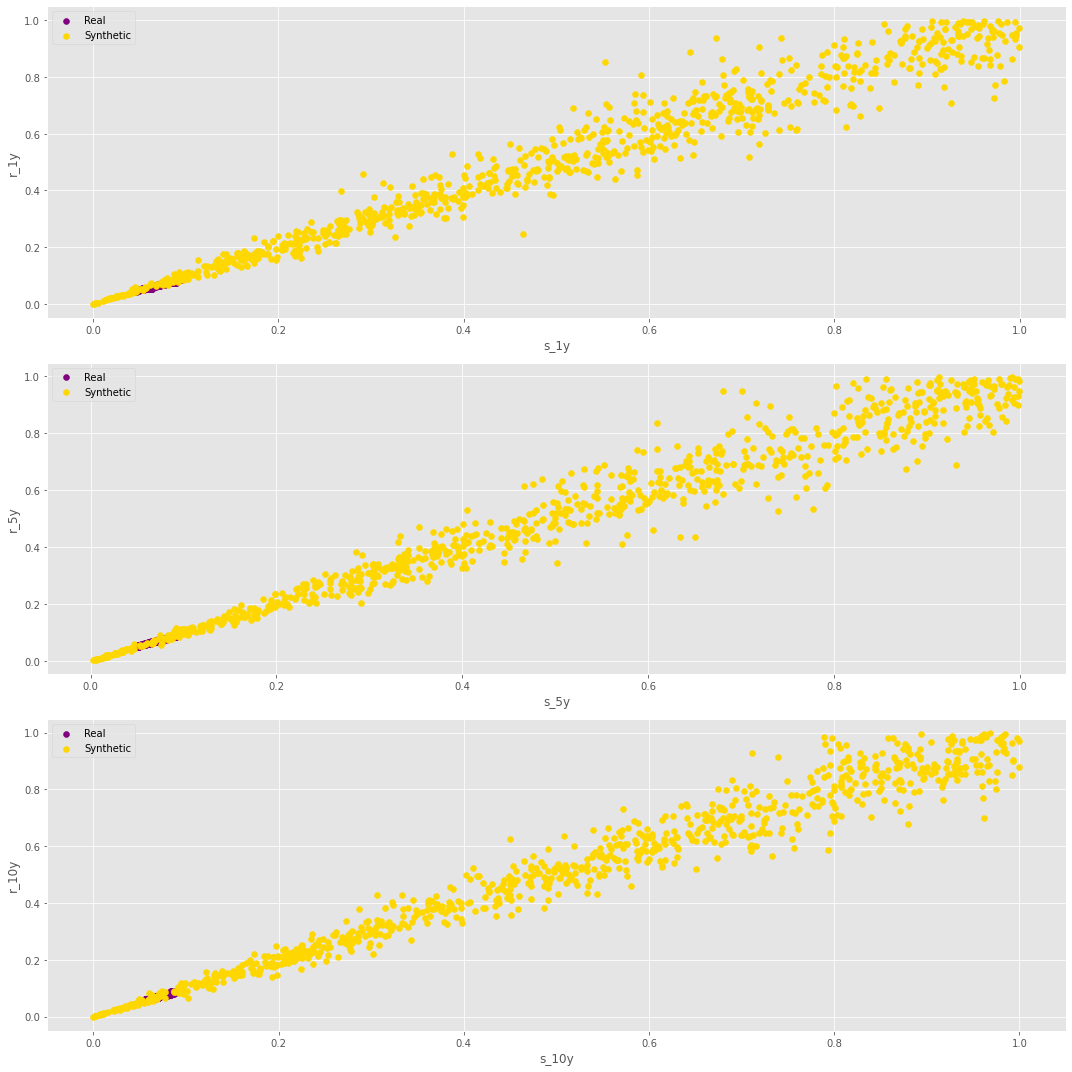

In [177]:
# Используем копулу Клейтона для попарного моделирования

from copulas.bivariate import Clayton
copula_C_1y=Clayton()
data_C_1y=np.array([df['s_1y'].to_numpy(), df['r_1y'].to_numpy()])
data_C_1y=data_C_1y.T
copula_C_1y.fit(data_C_1y)
synthetic_data_C_1y=copula_C_1y.sample(len(data_C_1y))
synthetic_data_C_1y=pd.DataFrame(synthetic_data_C_1y)

copula_C_5y=Clayton()
data_C_5y=np.array([df['s_5y'].to_numpy(), df['r_5y'].to_numpy()])
data_C_5y=data_C_5y.T
copula_C_5y.fit(data_C_5y)
synthetic_data_C_5y=copula_C_1y.sample(len(data_C_5y))
synthetic_data_C_5y=pd.DataFrame(synthetic_data_C_5y)

copula_C_10y=Clayton()
data_C_10y=np.array([df['s_10y'].to_numpy(), df['r_10y'].to_numpy()])
data_C_10y=data_C_10y.T
copula_C_10y.fit(data_C_10y)
synthetic_data_C_10y=copula_C_1y.sample(len(data_C_10y))
synthetic_data_C_10y=pd.DataFrame(synthetic_data_C_10y)

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))


axs[0].scatter(df['s_1y'], df['r_1y'], label='Real', color='purple' )
axs[0].scatter(synthetic_data_C_1y[0], synthetic_data_C_1y[1], label='Synthetic', color='gold')
axs[0].set_xlabel("s_1y")
axs[0].set_ylabel('r_1y')
axs[0].legend()

axs[1].scatter(df['s_5y'], df['r_5y'], label='Real', color='purple' )
axs[1].scatter(synthetic_data_C_5y[0], synthetic_data_C_5y[1], label='Synthetic', color='gold')
axs[1].set_xlabel("s_5y")
axs[1].set_ylabel('r_5y')
axs[1].legend()

axs[2].scatter(df['s_10y'], df['r_10y'], label='Real', color='purple' )
axs[2].scatter(synthetic_data_C_10y[0],synthetic_data_C_10y[1],  label='Synthetic', color='gold')
axs[2].set_xlabel("s_10y")
axs[2].set_ylabel('r_10y')
axs[2].legend()

fig.tight_layout()
plt.show()

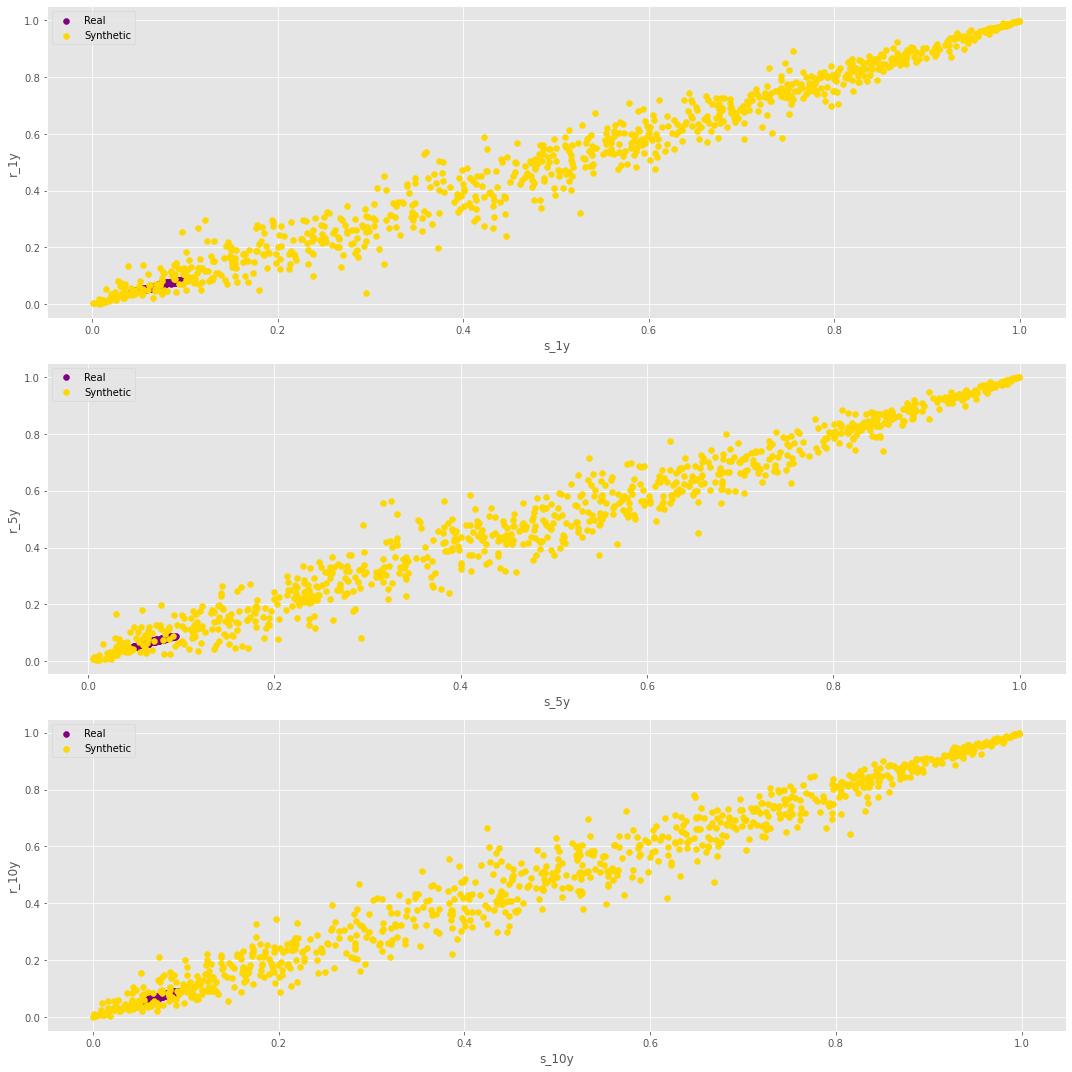

In [180]:
# Используем копулу Гумбеля для попарного моделирования

from copulas.bivariate import Gumbel
copula_G_1y=Gumbel()
data_G_1y=np.array([df['s_1y'].to_numpy(), df['r_1y'].to_numpy()])
data_G_1y=data_G_1y.T
copula_G_1y.fit(data_G_1y)
synthetic_data_G_1y=copula_G_1y.sample(len(data_G_1y))
synthetic_data_G_1y=pd.DataFrame(synthetic_data_G_1y)

copula_G_5y=Gumbel()
data_G_5y=np.array([df['s_5y'].to_numpy(), df['r_5y'].to_numpy()])
data_G_5y=data_G_5y.T
copula_G_5y.fit(data_G_5y)
synthetic_data_G_5y=copula_G_1y.sample(len(data_G_5y))
synthetic_data_G_5y=pd.DataFrame(synthetic_data_G_5y)

copula_G_10y=Gumbel()
data_G_10y=np.array([df['s_10y'].to_numpy(), df['r_10y'].to_numpy()])
data_G_10y=data_G_10y.T
copula_G_10y.fit(data_G_10y)
synthetic_data_G_10y=copula_G_1y.sample(len(data_G_10y))
synthetic_data_G_10y=pd.DataFrame(synthetic_data_G_10y)

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))


axs[0].scatter(df['s_1y'], df['r_1y'], label='Real', color='purple' )
axs[0].scatter(synthetic_data_G_1y[0], synthetic_data_G_1y[1], label='Synthetic', color='gold')
axs[0].set_xlabel("s_1y")
axs[0].set_ylabel('r_1y')
axs[0].legend()

axs[1].scatter(df['s_5y'], df['r_5y'], label='Real', color='purple' )
axs[1].scatter(synthetic_data_G_5y[0], synthetic_data_G_5y[1], label='Synthetic', color='gold')
axs[1].set_xlabel("s_5y")
axs[1].set_ylabel('r_5y')
axs[1].legend()

axs[2].scatter(df['s_10y'], df['r_10y'], label='Real', color='purple' )
axs[2].scatter(synthetic_data_G_10y[0],synthetic_data_G_10y[1],  label='Synthetic', color='gold')
axs[2].set_xlabel("s_10y")
axs[2].set_ylabel('r_10y')
axs[2].legend()

fig.tight_layout()
plt.show()


C:\Users\123\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
C:\Users\123\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


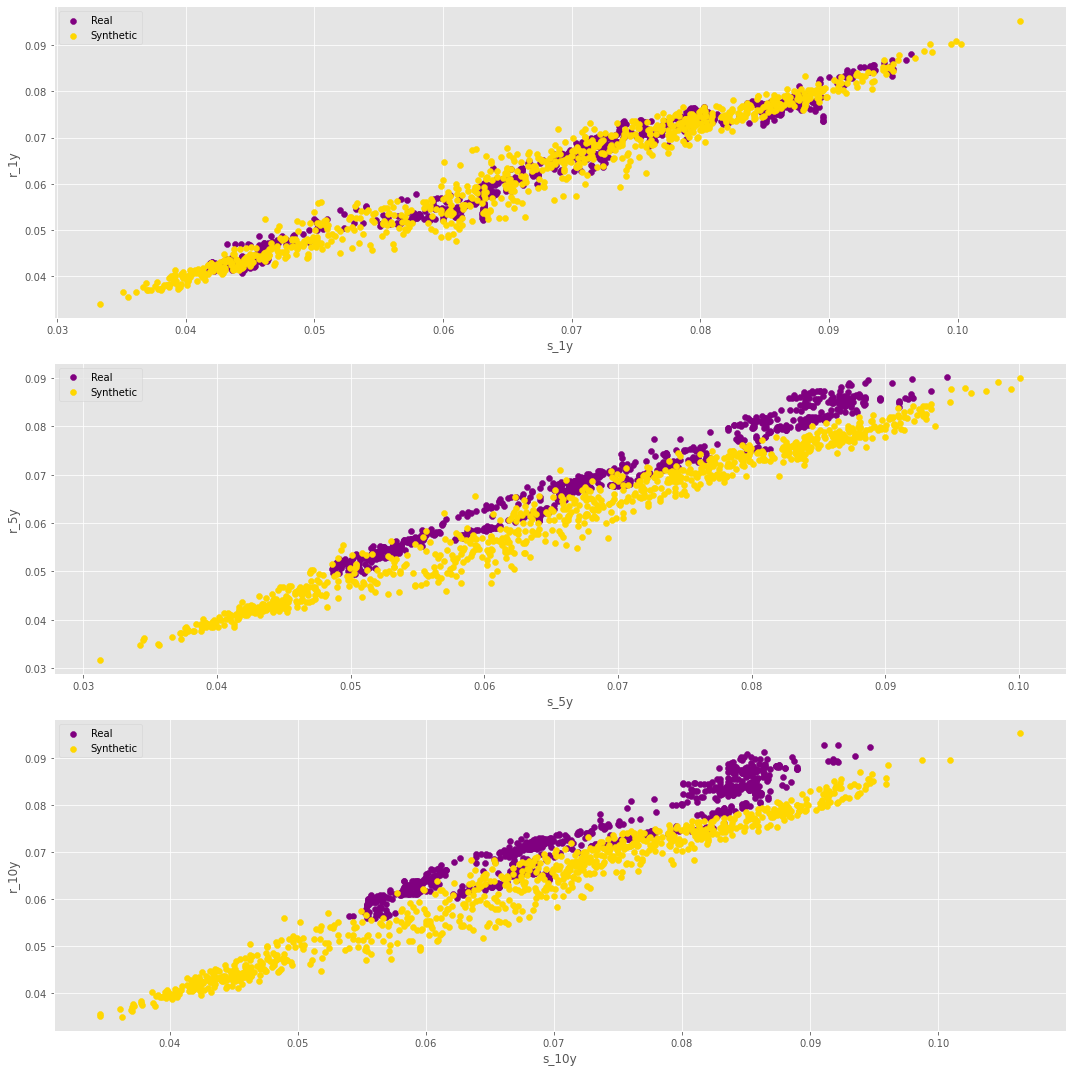

In [185]:
#Используем многомерную гауссовскую копулу для попарного моделирования

from copulas.multivariate import GaussianMultivariate
copula_GM_1y=GaussianMultivariate()
data_GM_1y=np.array([df['s_1y'].to_numpy(), df['r_1y'].to_numpy()])
data_GM_1y=data_GM_1y.T
copula_GM_1y.fit(data_GM_1y)
synthetic_data_GM_1y=copula_GM_1y.sample(len(data_GM_1y))
synthetic_data_GM_1y=pd.DataFrame(synthetic_data_GM_1y)

copula_GM_5y=GaussianMultivariate()
data_GM_5y=np.array([df['s_5y'].to_numpy(), df['r_5y'].to_numpy()])
data_GM_5y=data_GM_5y.T
copula_GM_5y.fit(data_GM_5y)
synthetic_data_GM_5y=copula_GM_1y.sample(len(data_GM_5y))
synthetic_data_GM_5y=pd.DataFrame(synthetic_data_GM_5y)

copula_GM_10y=GaussianMultivariate()
data_GM_10y=np.array([df['s_10y'].to_numpy(), df['r_10y'].to_numpy()])
data_GM_10y=data_GM_10y.T
copula_GM_10y.fit(data_GM_10y)
synthetic_data_GM_10y=copula_GM_1y.sample(len(data_GM_10y))
synthetic_data_GM_10y=pd.DataFrame(synthetic_data_GM_10y)

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))


axs[0].scatter(df['s_1y'], df['r_1y'], label='Real', color='purple' )
axs[0].scatter(synthetic_data_GM_1y[0], synthetic_data_GM_1y[1], label='Synthetic', color='gold')
axs[0].set_xlabel("s_1y")
axs[0].set_ylabel('r_1y')
axs[0].legend()

axs[1].scatter(df['s_5y'], df['r_5y'], label='Real', color='purple' )
axs[1].scatter(synthetic_data_GM_5y[0], synthetic_data_GM_5y[1], label='Synthetic', color='gold')
axs[1].set_xlabel("s_5y")
axs[1].set_ylabel('r_5y')
axs[1].legend()

axs[2].scatter(df['s_10y'], df['r_10y'], label='Real', color='purple' )
axs[2].scatter(synthetic_data_GM_10y[0],synthetic_data_GM_10y[1],  label='Synthetic', color='gold')
axs[2].set_xlabel("s_10y")
axs[2].set_ylabel('r_10y')
axs[2].legend()

fig.tight_layout()
plt.show()

C:\Users\123\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
C:\Users\123\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


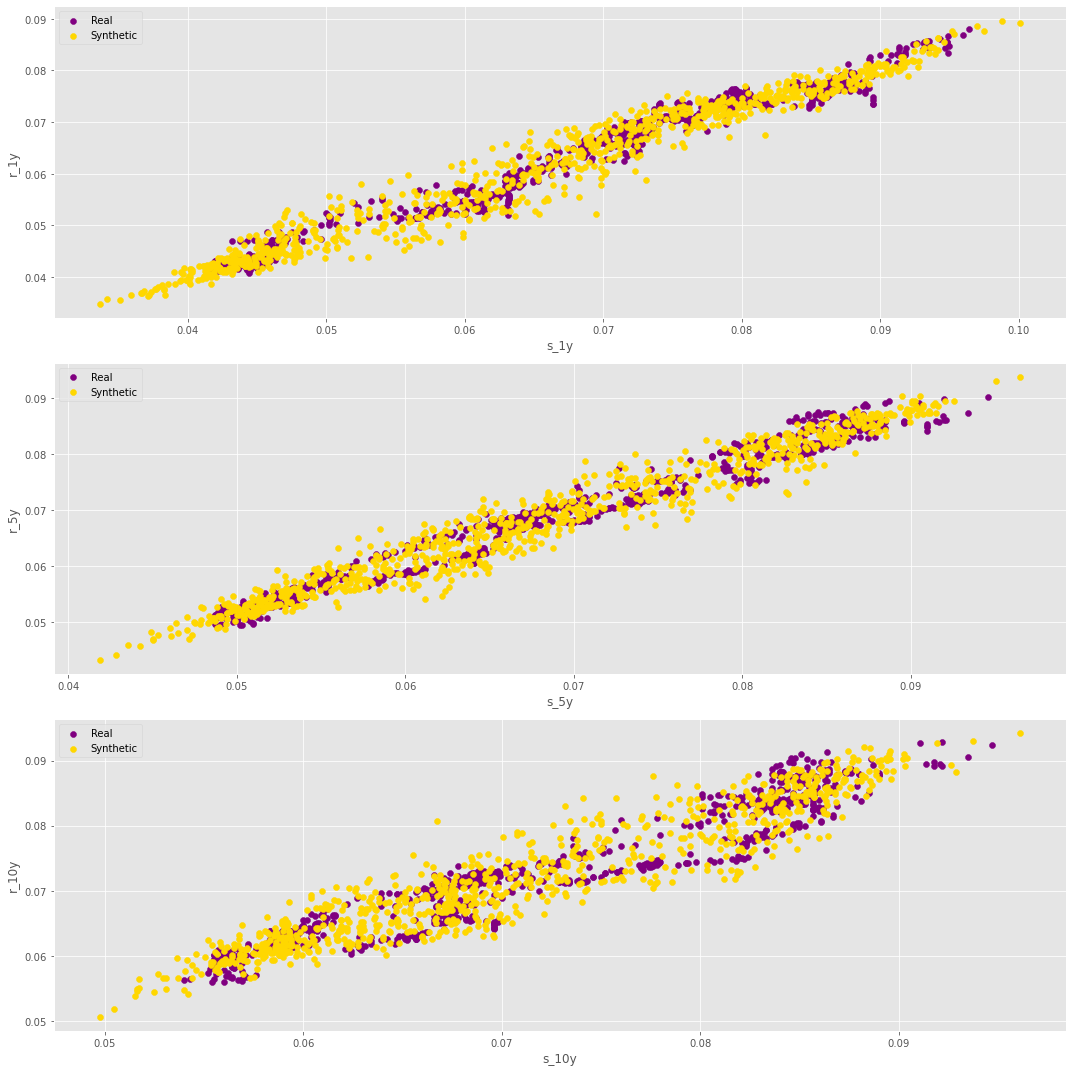

In [189]:
# Используем многомерную гауссовскую копулу для совместного распрделения 3, 5, 10-ти летних теноров как свопов, так и КБД

data2=df[['s_1y', 's_5y', 's_10y','r_1y', 'r_5y', 'r_10y']]
copula=GaussianMultivariate()
copula.fit(data2)
synthetic_data2=copula.sample(len(data2))
synthetic_data2
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))


axs[0].scatter(df['s_1y'], df['r_1y'], label='Real', color='purple' )
axs[0].scatter(synthetic_data2['s_1y'], synthetic_data2['r_1y'], label='Synthetic', color='gold')
axs[0].set_xlabel("s_1y")
axs[0].set_ylabel('r_1y')
axs[0].legend()

axs[1].scatter(df['s_5y'], df['r_5y'], label='Real', color='purple' )
axs[1].scatter(synthetic_data2['s_5y'], synthetic_data2['r_5y'], label='Synthetic', color='gold')
axs[1].set_xlabel("s_5y")
axs[1].set_ylabel('r_5y')
axs[1].legend()

axs[2].scatter(df['s_10y'], df['r_10y'], label='Real', color='purple' )
axs[2].scatter(synthetic_data2['s_10y'], synthetic_data2['r_10y'], label='Synthetic', color='gold')
axs[2].set_xlabel("s_10y")
axs[2].set_ylabel('r_10y')
axs[2].legend()

fig.tight_layout()
plt.show()

# Вывод

Копулы Клейтона, Гумбеля и Фрэнка совершенно непригодны для моделирования базиса. Двумерная Гауссовская копула показывает лучшую подгонку, но тем не менее для базиса для 10-ти летних свопов приближение не так хорошо. Наиболее удачной стратегией моделирования, кажется, является моделирование всех теноров свопов и КБД с помощью многмерной гауссовской копулы. 